Mundenhof Base Station (North)
===

Date: 23.11.2022

Time: 11:36:17 - 11:49:32 GMT+1

Duration: 0:13:15

Movement: Static

GPS update period: 0.25 s

## Summary of the Analysis

- The LLA cordinate is believed to be 48.00990833°N, 7.78491417°E, 276.4 m

# Data Pre-processing

## Load CSV File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

filename = "tableview_221123_140637_full.csv"  # update csv filename here

frequency = 4   # update data update rate

# Reference point information
ref_lla = [48.012317, 7.813296, 289.4]  # Geodetic: Lat, Lon, Alt (HAE)
ref_lla_err = [1.1, 0.8, 0.1 ]  # errors in m
ref_ecef = [4235206.8, 581152.46, 4718007.72]  # Earth Centered - Earth Fixed: x, y, z

df = pd.read_csv(filename)

# Convert UTC column to datetime
df["UTC"] = pd.to_datetime(df["UTC"])

## Additional Data

In [2]:
df["DGPS"] = df["DGPS"].eq("Yes").astype(int)
df["dT"] = df["UTC"].diff() / np.timedelta64(1, "s")
df["Alt (HAE) Rate of Change"] = df["Alt (HAE)"].diff() * df["dT"]
df["Alt Error"] = df["Alt (HAE)"] - ref_lla[2]
df["ECEF Error X"] = df["X"] - ref_ecef[0]
df["ECEF Error Y"] = df["Y"] - ref_ecef[1]
df["ECEF Error Z"] = df["Z"] - ref_ecef[2]
df["ECEF Error"] = np.sqrt(df["ECEF Error X"] ** 2 + df["ECEF Error Y"] ** 2 + df["ECEF Error Z"] ** 2)

## Unuseful a.t.m
df["X Diff"] = df["X"].diff()
df["Y Diff"] = df["Y"].diff()
df["Z Diff"] = df["Z"].diff()
df["Distance Change"] = np.sqrt(df["X Diff"] ** 2 + df["Y Diff"] ** 2 + df["Z Diff"] ** 2)
df["Velocity"] = df["Distance Change"] * df["dT"]

# Summary of data frame
df.info()
pd.set_option('display.max_columns', None)
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     3180 non-null   int64         
 1   UTC                       3180 non-null   datetime64[ns]
 2   GPS time                  3180 non-null   object        
 3   Fix type (GPS)            3180 non-null   object        
 4   DGPS                      3180 non-null   int64         
 5   Carrier Range Status      3180 non-null   int64         
 6   X                         3180 non-null   float64       
 7   Y                         3180 non-null   float64       
 8   Z                         3180 non-null   float64       
 9   Lat                       3180 non-null   float64       
 10  Lon                       3180 non-null   float64       
 11  Alt (HAE)                 3180 non-null   float64       
 12  Alt (MSL)           

Index                     UTC         GPS time Fix type (GPS)  DGPS  \
3177   3177 2022-11-23 10:49:32.000  2237:298190.000             3D     1   
3178   3178 2022-11-23 10:49:32.250  2237:298190.250             3D     1   
3179   3179 2022-11-23 10:49:32.500  2237:298190.500             3D     1   

      Carrier Range Status            X           Y            Z        Lat  \
3177                     2  4235682.781  579080.225  4717818.886  48.009908   
3178                     2  4235682.781  579080.225  4717818.886  48.009908   
3179                     2  4235682.781  579080.225  4717818.886  48.009908   

           Lon  Alt (HAE)  Alt (MSL)  VX  VY  VZ  VN  VE  VD   SoG  VACC 3D  \
3177  7.784914      276.4      229.1 NaN NaN NaN NaN NaN NaN  0.01      NaN   
3178  7.784914      276.4      229.1 NaN NaN NaN NaN NaN NaN  0.01      NaN   
3179  7.784914      276.4      229.1 NaN NaN NaN NaN NaN NaN  0.01      NaN   

      2d Err  HDOP  VDOP  PDOP  SVs Tracked  SVs Used  \
3177     NaN   0.5   0.9   1.1           43        29   
3178     NaN   0.5   0.9   1.1           43        29   
3179     NaN   0.5   0.9   1.1           43        29   

                                               Used SVs    dT  \
3177  G2 G5 G6 G7 G9 G11 G13 G14 G20 G30 R3 R4 R5 R1...  0.25   
3178  G2 G5 G6 G7 G9 G11 G13 G14 G20 G30 R3 R4 R5 R1...  0.25   
3179  G2 G5 G6 G7 G9 G11 G13 G14 G20 G30 R3 R4 R5 R1...  0.25   

      Alt (HAE) Rate of Change  Alt Error  ECEF Error X  ECEF Error Y  \
3177                       0.0      -13.0       475.981     -2072.235   
3178                       0.0      -13.0       475.981     -2072.235   
3179                       0.0      -13.0       475.981     -2072.235   

      ECEF Error Z   ECEF Error  X Diff  Y Diff  Z Diff  Distance Change  \
3177      -188.834  2134.566487     0.0     0.0     0.0              0.0   
3178      -188.834  2134.566487     0.0     0.0     0.0              0.0   
3179      -188.834  2134.566487     0.0     0.0     0.0              0.0   

      Velocity  
3177       0.0  
3178       0.0  
3179       0.0

# Basic Statistics

In [3]:
print("Number of data points:", df["Index"].count())

idx_RTK_lockin = df.loc[(df["DGPS"] == 1) & (df["Carrier Range Status"] > 0)].index[0]

print(f"Index of first RTK lock-in: {idx_RTK_lockin}")

df.describe()

Number of data points: 3180
Index of first RTK lock-in: 63


Index         DGPS  Carrier Range Status             X  \
count  3180.000000  3180.000000           3180.000000  3.180000e+03   
mean   1589.500000     0.980503              1.215409  4.235682e+06   
std     918.131254     0.138285              0.462988  6.842242e-01   
min       0.000000     0.000000              0.000000  4.235679e+06   
25%     794.750000     1.000000              1.000000  4.235682e+06   
50%    1589.500000     1.000000              1.000000  4.235682e+06   
75%    2384.250000     1.000000              1.000000  4.235682e+06   
max    3179.000000     1.000000              2.000000  4.235685e+06   

                   Y             Z          Lat          Lon    Alt (HAE)  \
count    3180.000000  3.180000e+03  3180.000000  3180.000000  3180.000000   
mean   579080.229661  4.717818e+06    48.009909     7.784915   275.524371   
std         0.466049  5.594537e-01     0.000004     0.000006     0.777054   
min    579079.257000  4.717817e+06    48.009894     7.784903   272.800000   
25%    579079.836000  4.717818e+06    48.009907     7.784911   275.200000   
50%    579080.239000  4.717818e+06    48.009909     7.784914   275.400000   
75%    579080.493000  4.717819e+06    48.009910     7.784918   275.800000   
max    579081.327000  4.717821e+06    48.009921     7.784931   279.000000   

         Alt (MSL)   VX   VY   VZ        VN        VE   VD          SoG  \
count  3180.000000  0.0  0.0  0.0  2.000000  2.000000  0.0  3180.000000   
mean    228.224371  NaN  NaN  NaN  0.230000 -0.045000  NaN     0.015160   
std       0.777054  NaN  NaN  NaN  0.028284  0.021213  NaN     0.014756   
min     225.500000  NaN  NaN  NaN  0.210000 -0.060000  NaN     0.000000   
25%     227.900000  NaN  NaN  NaN  0.220000 -0.052500  NaN     0.010000   
50%     228.100000  NaN  NaN  NaN  0.230000 -0.045000  NaN     0.010000   
75%     228.500000  NaN  NaN  NaN  0.240000 -0.037500  NaN     0.020000   
max     231.700000  NaN  NaN  NaN  0.250000 -0.030000  NaN     0.260000   

       VACC 3D  2d Err         HDOP         VDOP         PDOP  SVs Tracked  \
count      0.0     0.0  3180.000000  3180.000000  3180.000000  3180.000000   
mean       NaN     NaN     0.558868     0.971635     1.122233    40.462264   
std        NaN     NaN     0.049534     0.076247     0.055005     2.997455   
min        NaN     NaN     0.500000     0.800000     0.900000    24.000000   
25%        NaN     NaN     0.500000     0.900000     1.100000    41.000000   
50%        NaN     NaN     0.600000     1.000000     1.100000    41.000000   
75%        NaN     NaN     0.600000     1.000000     1.200000    42.000000   
max        NaN     NaN     0.700000     1.200000     1.400000    43.000000   

          SVs Used       dT  Alt (HAE) Rate of Change    Alt Error  \
count  3180.000000  3179.00               3179.000000  3180.000000   
mean     30.252201     0.25                  0.000087   -13.875629   
std       0.809610     0.00                  0.009946     0.777054   
min      13.000000     0.25                 -0.050000   -16.600000   
25%      30.000000     0.25                  0.000000   -14.200000   
50%      30.000000     0.25                  0.000000   -14.000000   
75%      31.000000     0.25                  0.000000   -13.600000   
max      31.000000     0.25                  0.275000   -10.400000   

       ECEF Error X  ECEF Error Y  ECEF Error Z   ECEF Error       X Diff  \
count   3180.000000   3180.000000   3180.000000  3180.000000  3179.000000   
mean     475.312403  -2072.230339   -189.416555  2134.464789     0.000359   
std        0.684224      0.466049      0.559454     0.392112     0.037502   
min      472.621000  -2073.203000   -190.878000  2133.216480    -0.256000   
25%      475.149000  -2072.624000   -189.739000  2134.251921     0.000000   
50%      475.263000  -2072.221000   -189.540000  2134.545154     0.000000   
75%      475.696000  -2071.967000   -189.069000  2134.724443     0.000000   
max      477.951000  -2071.133000   -187.001000  2135

# Navigation Status

In [4]:
# Helper Functions
# TODO: Make it a module for import

def highlight_carrier_status(ax, df):
    idxes = df[df["Carrier Range Status"].diff() != 0 ].index.tolist()
    idxes.append(df.index.max()+1)
    
    for start, end in zip(idxes, idxes[1:]):
        status = df["Carrier Range Status"][start]
        if status == 1:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="blue")
        elif status == 2:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="green")
        else:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="red")


Red region: No solution for carrier-phase measurement (carrier-range status = 0)
Blue region: Float mode for carrier range. Not all carrier-phase ambiguities are resolved. (carrier-range status = 1)
Green resion: Fix mode for carrier range. All carrier-phase ambiguities are resolved. (carrier-range status = 2)


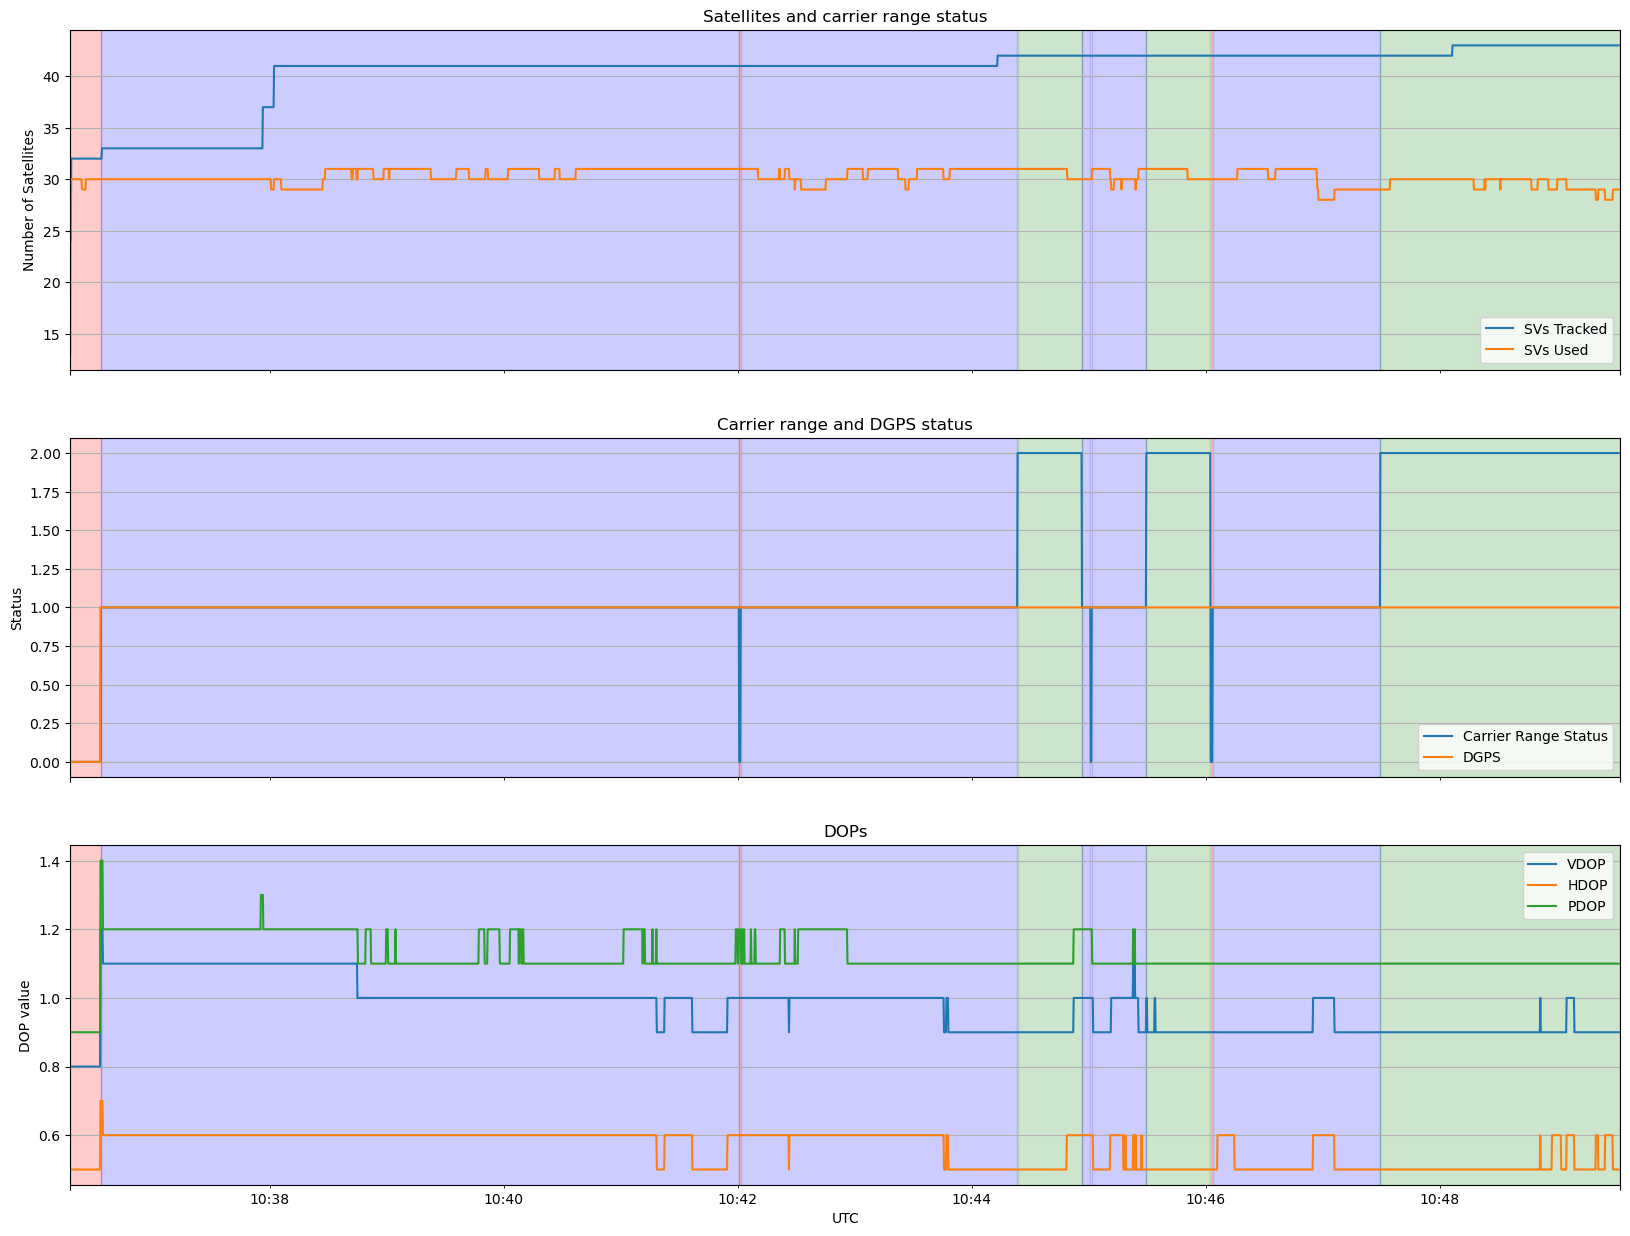

Total no. of data points = 3180
Data points without carrier range availability = 72 (2.26%)
Data points with "float" carrier range status = 2351 (73.93%)
Data points with "fix" carrier range status = 757 (23.81%)


In [5]:
print("Red region: No solution for carrier-phase measurement (carrier-range status = 0)")
print("Blue region: Float mode for carrier range. Not all carrier-phase ambiguities are resolved. (carrier-range status = 1)")
print("Green resion: Fix mode for carrier range. All carrier-phase ambiguities are resolved. (carrier-range status = 2)")

fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

df.plot(ax=ax[0],
        title="Satellites and carrier range status",
        x="UTC",
        y=["SVs Tracked", "SVs Used"],
        ylabel="Number of Satellites",
        grid=True)

df.plot(ax=ax[1],
        title="Carrier range and DGPS status",
        x="UTC",
        y=["Carrier Range Status", "DGPS"],
        ylabel="Status",
        grid=True)

df.plot(ax=ax[2],
        title="DOPs",
        x="UTC",
        y=["VDOP", "HDOP", "PDOP"],
        ylabel="DOP value",
        grid=True)

for i in range(3):
    highlight_carrier_status(ax[i], df)

plt.show()

df_cs = df["Carrier Range Status"]
df_cs_total_cnt = df_cs.count()
df_cs_nofix_cnt = df_cs[df_cs == 0].count()
df_cs_float_cnt = df_cs[df_cs == 1].count()
df_cs_fix_cnt = df_cs[df_cs == 2].count()

print(f"Total no. of data points = {df_cs_total_cnt}")
print(f"Data points without carrier range availability = {df_cs_nofix_cnt} ({df_cs_nofix_cnt / df_cs_total_cnt * 100:0.2f}%)")
print(f"Data points with \"float\" carrier range status = {df_cs_float_cnt} ({df_cs_float_cnt / df_cs_total_cnt * 100:0.2f}%)")
print(f"Data points with \"fix\" carrier range status = {df_cs_fix_cnt} ({df_cs_fix_cnt / df_cs_total_cnt * 100:0.2f}%)")

## Observations

- High number of satellites in track/ used
- Carrier-phase range solution available for most of the time, but only less than 1/4 of the time the ambiguities are fully fixed.
- It took over 8 minutes to have the first full carrier range solution
- DOPs are lower before RTK lock-in, which is unreasonable. May ignore them for now.

# Altitude (HAE)

Altitude of reference point: 289.4 m +- 0.1 m


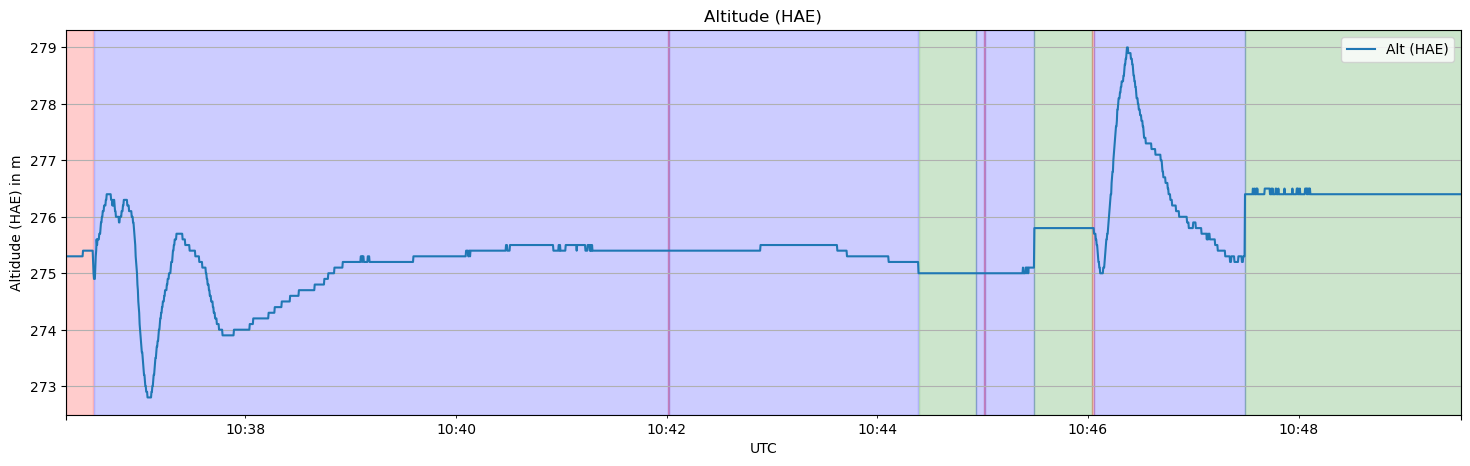

In [6]:
###
# Plot altitude vs time
###

print(f"Altitude of reference point: {ref_lla[2]} m +- {ref_lla_err[2]} m")

fig1, ax = plt.subplots(1, 1, figsize=(18, 5), sharex=True)
ax.set_title("Altitude (HAE)")
df.plot(ax=ax, x="UTC", y="Alt (HAE)", grid=True)
ax.set_ylabel("Altidude (HAE) in m")
highlight_carrier_status(ax, df)  # highight region according to carrier-phase status

## Carrier phase status
#ax[1].set_ylabel("Status")
#df.plot(ax=ax[1], x="UTC", y=["Carrier Range Status", "DGPS"], grid=True)

## VDOP
#ax[2].set_ylabel("VDOP")
#df.plot(ax=ax[2], x="UTC", y="VDOP", style='g-', grid=True)
#ax[0].set_xlabel("Time (UTC)")

#for i in range(3):
#    ax[i].axvspan(df["UTC"][0], df["UTC"][idx_RTK_lockin], alpha=0.2, color="red")

plt.show()

## Carrier Range = Fixed Only

In [7]:
###
# Helper functions for error evaluatinn
###

def ecdf(a: np.array):
    """
    Returns a tuple (value, #occurence) of the fiven data vector a
    """
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_hist_acdf_stat(ds, bins, quantile, hist_title, acdf_title, xlabel, unit):
    
    # Plot histogram
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    ds.hist(ax=ax[0], bins=bins)
    ax[0].set_title(hist_title)
    ax[0].set_ylabel("Frequency")
    ax[0].set_xlabel(f"{xlabel} ({unit})")
    , 
    # Plot CDF
    x, cusum = ecdf(ds)
    
    ax[1].plot(x, cusum)
    #ds_abs.hist(ax=ax[1], cumulative=True, density=False, bins=bins, histtype="stepfilled")
    ax[1].set_title(acdf_title)
    ax[1].set_ylabel("Likelihood of occurrence")
    ax[1].set_xlabel(f"{xlabel} ({unit})")
    ax[1].set_ylim((0.0, 1.1))
    plt.show()
    
    # List out statistics
    print("===Statistics (After RTK In-force)===")
    print("mean:", ds.mean(), unit)
    print("median:", ds.median(), unit)
    #print("mode:", ds.mode(), unit)
    print("max:", ds.max(), unit)
    print("min:", ds.min(), unit)
    
    for q in quantile:
        print(f"{(int)(q*100):d}th-percentile: {ds.quantile(q=q)} {unit}")

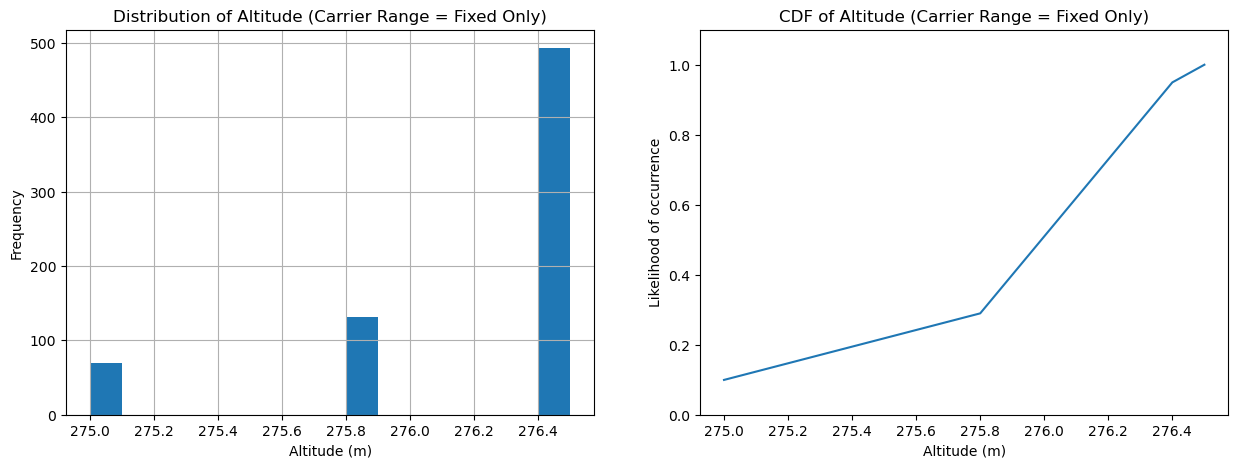

===Statistics (After RTK In-force)===
mean: 276.1517291066283 m
median: 276.4 m
max: 276.5 m
min: 275.0 m
95th-percentile: 276.435 m
88th-percentile: 276.4 m
50th-percentile: 276.4 m
25th-percentile: 275.8 m


In [8]:
df_carrier_2 = df.loc[df["Carrier Range Status"] == 2][idx_RTK_lockin:]
alt = df_carrier_2["Alt (HAE)"]
alt_bins = (int)(math.ceil((alt.max() - alt.min())*10))
plot_hist_acdf_stat(alt,
                      bins = alt_bins,
                      quantile = [0.95, 0.88, 0.5, 0.25],
                      hist_title = "Distribution of Altitude (Carrier Range = Fixed Only)",
                      acdf_title = "CDF of Altitude (Carrier Range = Fixed Only)",
                      xlabel = "Altitude",
                      unit = "m")

## Observations

- There are a few meters of deviation in Altitude for some short periods of time
- The lost of carrier range at 11:46 should be responsible to the big jump
- Altitude ouput concentrated at 275.4m for a period, then concentrated to 276.4m at the end
- As the later part stayed almost constant for a longer period, the altitude is believed to be 276.4m

# Position

In [9]:
# Helper function
# TODO: move to python module
def dist_lat_lon_to_meter(lat2, lat1, lon2, lon1):
    # Use Haversine formula to find distance (in m) between 2 point in lat/lon coordinate
    r = 6371  # approximate radius of earth
    
    dlat = math.radians(lat2) - math.radians(lat1)
    dlon = math.radians(lon2) - math.radians(lon1)

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return r * c * 1000

## Position Map

In [10]:
# Select data
loc = df.loc[:, ["Index", "UTC", "Alt (HAE)", "X", "Y", "Z", "Lat", "Lon", "HDOP"]]
loc_rtk = df.loc[:, ["Index", "UTC", "X", "Y", "Z", "Lat", "Lon"]][idx_RTK_lockin:]

# Basic statistics
lat = loc_rtk["Lat"]
lat_max = lat.max()
lat_max_idx = lat.idxmax()
lat_max_utc = loc_rtk["UTC"][lat_max_idx]
lat_min = lat.min()
lat_min_idx = lat.idxmin()
lat_mean = lat.mean()
lat_median = lat.median()
lat_std = lat.std()
lat_var = lat.var()
lat_95til = lat.quantile(q=0.95)

long = loc_rtk["Lon"]
long_max = long.max()
long_max_idx = long.idxmax()
long_max_utc = df["UTC"][long_max_idx]
long_min = long.min()
long_min_idx = long.idxmin()
long_mean = long.mean()
long_median = long.median()
long_std = long.std()
long_var = long.var()
long_95til = long.quantile(q=0.95)

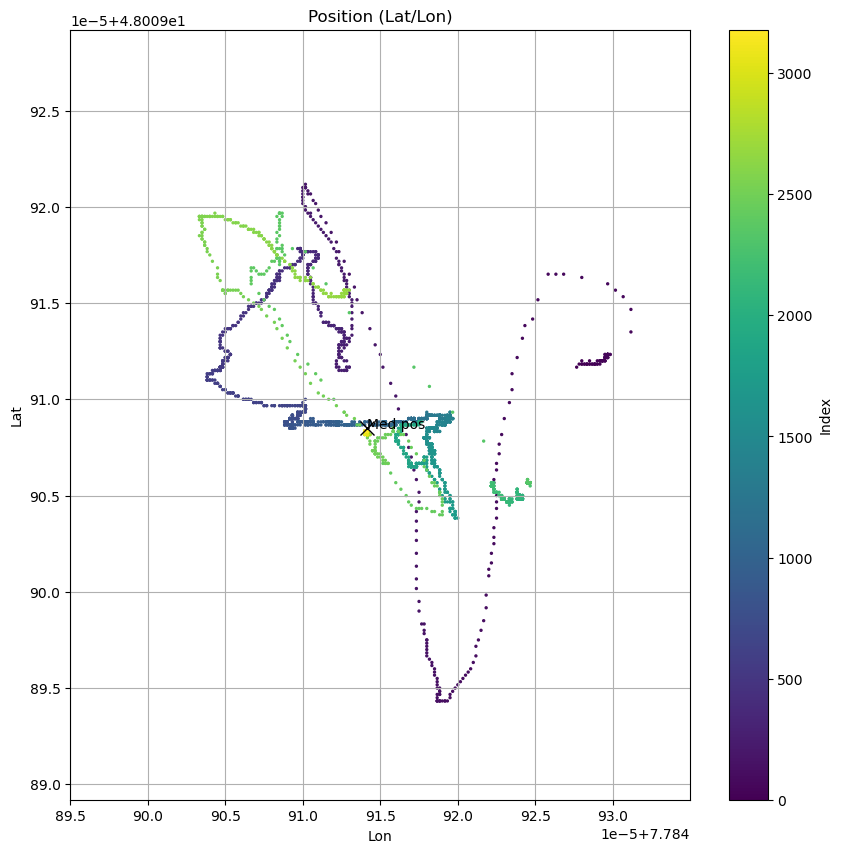

Medium lat/lon: 48.0099085, 7.78491417


In [11]:
###
# Plot position map
###


div = 0.00002

fig = loc.plot.scatter(title="Position (Lat/Lon)",
                       x="Lon",
                       y="Lat",
                       c="Index",
                       xlim=(long_mean - div, long_mean + div),
                       ylim=(lat_mean - div, lat_mean + div),
                       colormap="viridis",
                       colorbar=True,
                       s=2,
                       grid=True,
                       figsize=(10, 10))
plt.plot(long_median, lat_median, marker="x", markersize=10, markeredgecolor="black")  # mark median position
fig.annotate("Med pos", xy=(long_median, lat_median))  # TODO: add arrow
plt.plot(ref_lla[1], ref_lla[0], marker="x", markersize=10, markeredgecolor="red")  # mark reference point
fig.annotate("Ref. pt", xy=(ref_lla[1], ref_lla[0]))  # TODO: add arrow
plt.show()

print(f"Medium lat/lon: {lat_median}, {long_median}")

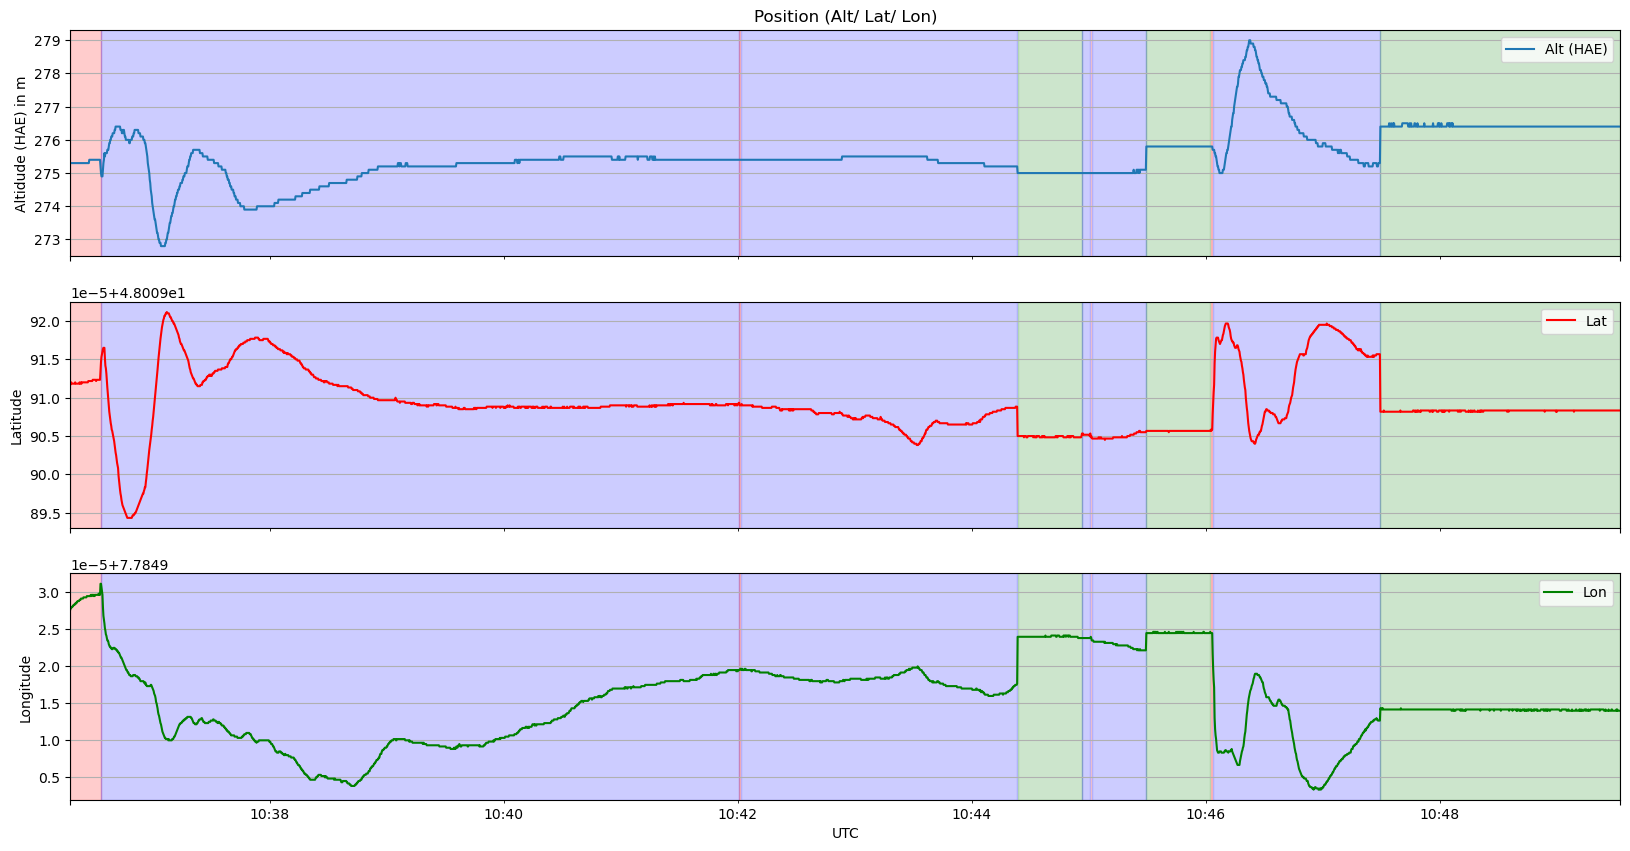

In [12]:
### 
# Plot latitude, longitude, altitude vs time
###

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(20, 10))
ax[0].set_title("Position (Alt/ Lat/ Lon)")
loc.plot(ax=ax[0], x="UTC", y="Alt (HAE)", xlabel="Time (UTC)", ylabel="Altidude (HAE) in m", grid=True)
loc.plot(ax=ax[1], x="UTC", y="Lat", ylabel="Latitude", style='r-', grid=True)
loc.plot(ax=ax[2], x="UTC", y="Lon", ylabel="Longitude", style='g-', grid=True)

## VDOP
#df.plot(ax=ax[3], x="UTC", y="HDOP", style='y-', grid=True)
#ax[3].set_xlabel("Time (UTC)")
#ax[3].set_ylabel("HDOP")

for i in range(3):
    #ax[i].axvspan(df["UTC"][0], df["UTC"][idx_DGPS_lockin], alpha=0.2, color="red")
    highlight_carrier_status(ax[i], df)
plt.show()

## Carrier Range = Fixed Only

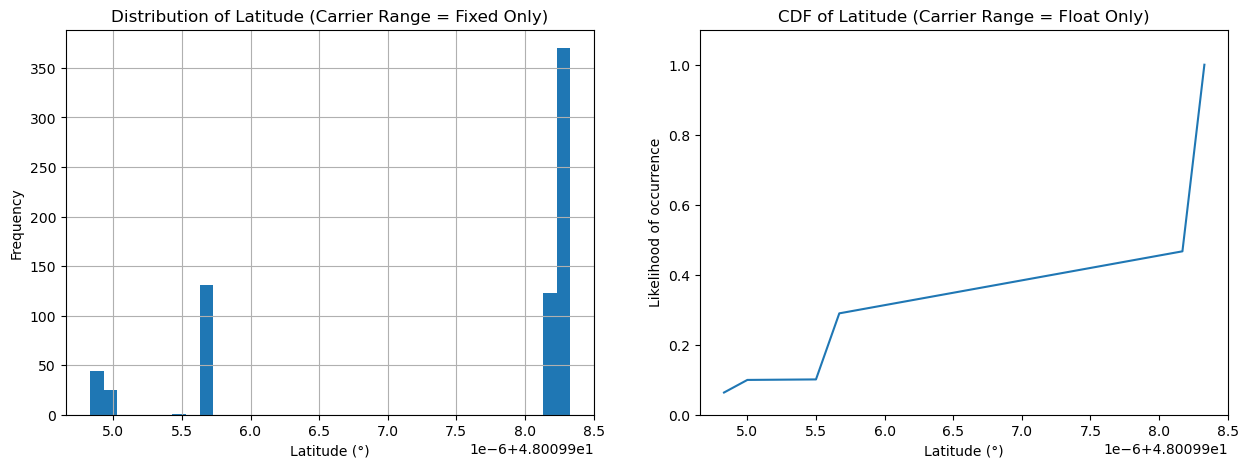

===Statistics (After RTK In-force)===
mean: 48.00990745360232 °
median: 48.00990833 °
max: 48.00990833 °
min: 48.00990483 °
95th-percentile: 48.00990833 °
88th-percentile: 48.00990833 °
50th-percentile: 48.00990833 °
25th-percentile: 48.00990567 °


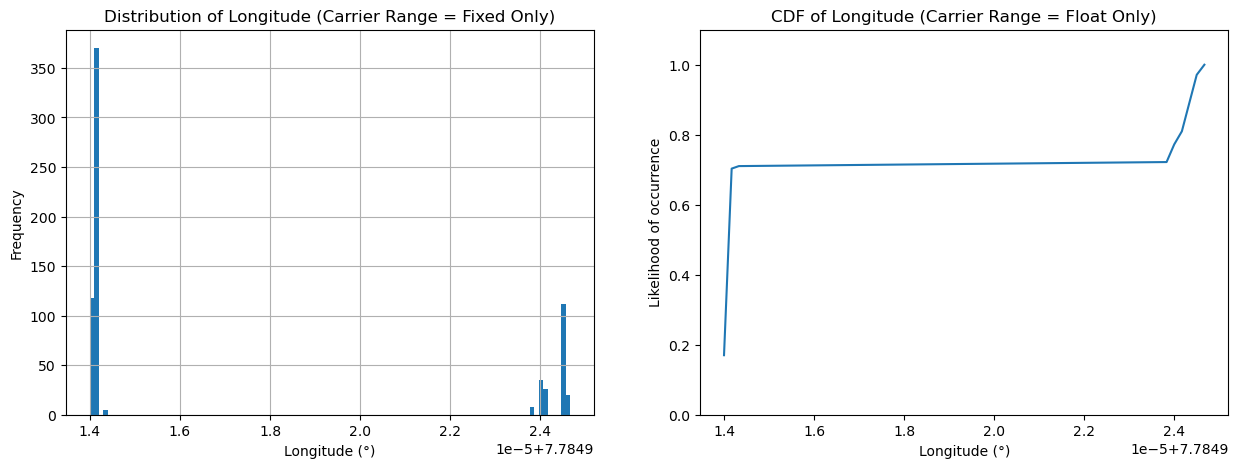

===Statistics (After RTK In-force)===
mean: 7.784917093674353 °
median: 7.78491417 °
max: 7.78492467 °
min: 7.784914 °
95th-percentile: 7.7849245 °
88th-percentile: 7.7849245 °
50th-percentile: 7.78491417 °
25th-percentile: 7.78491417 °


In [13]:
df_carrier_2 = df.loc[df["Carrier Range Status"] == 2][idx_RTK_lockin:]
lat = df_carrier_2["Lat"]
lat_bins = (int)(math.ceil((lat.max() - lat.min())/0.0000001))
plot_hist_acdf_stat(lat,
                  bins = lat_bins,
                  quantile = [0.95, 0.88, 0.5, 0.25],
                  hist_title = "Distribution of Latitude (Carrier Range = Fixed Only)",
                  acdf_title = "CDF of Latitude (Carrier Range = Float Only)",
                  xlabel = "Latitude",
                  unit = "°")

lon = df_carrier_2["Lon"]
lon_bins = (int)(math.ceil((lon.max() - lon.min())/0.0000001))
plot_hist_acdf_stat(df_carrier_2["Lon"],
                          bins = lon_bins,
                          quantile = [0.95, 0.88, 0.5, 0.25],
                          hist_title = "Distribution of Longitude (Carrier Range = Fixed Only)",
                          acdf_title = "CDF of Longitude (Carrier Range = Float Only)",
                          xlabel = "Longitude",
                          unit = "°")

## Observations

- The median lat/lon is 48.00990833°N, 7.78491417°E

# Ground Speed

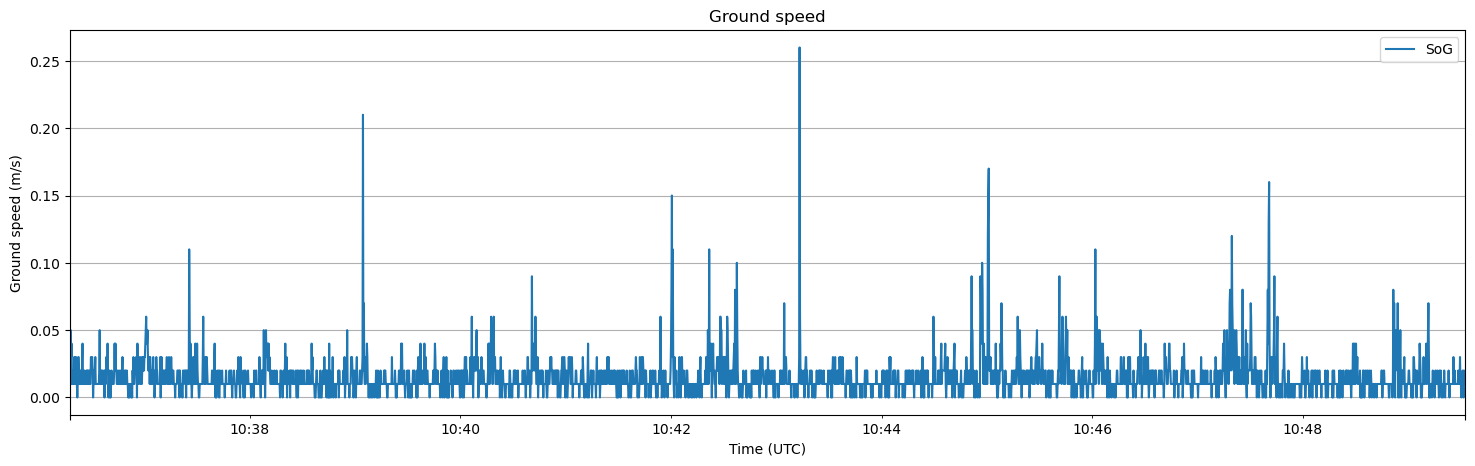

In [14]:
###
# Plot ground speed
###

sog = df.loc[:, ["UTC", "SoG"]]

sog.plot(title="Ground speed", x="UTC", y="SoG", xlabel="Time (UTC)", ylabel="Ground speed (m/s)", figsize=(18, 5), grid=True)
plt.show()

## Observations

- Due to deviation in position measurements, ground speed outputs were not 0 for most of the time